In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [18]:
train_data=pd.read_csv('/content/drive/MyDrive/碩一下/Machine Learning/Homework_3/sf-crime/train.csv.zip')
test_data=pd.read_csv('/content/drive/MyDrive/碩一下/Machine Learning/Homework_3/sf-crime/test.csv.zip')

In [19]:
train_data.head(2)
# y = Category

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [20]:
test_data.head(2)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432


In [21]:
train_data.drop(['Descript','Resolution','Address'],inplace=True,axis=1)
test_data.drop('Address',axis=1,inplace=True)

In [22]:
train_data.columns

Index(['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'X', 'Y'], dtype='object')

In [23]:
test_data.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'X', 'Y'], dtype='object')

In [24]:
train_data['DayOfWeek'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [25]:
test_data['DayOfWeek'].unique()

array(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday',
       'Monday'], dtype=object)

In [26]:
# one-hot encoding
dummies_train=pd.get_dummies(train_data['PdDistrict'])
dummies_test=pd.get_dummies(test_data['PdDistrict'])

train_data=pd.concat([train_data,dummies_train],axis=1)
train_data.drop('PdDistrict',inplace=True,axis=1)

test_data=pd.concat([test_data,dummies_test],axis=1)
test_data.drop('PdDistrict',inplace=True,axis=1)

In [28]:
# 把日期各項獨立出來
train_data['Dates'] = pd.to_datetime(train_data['Dates'])

train_data['year'] = train_data['Dates'].dt.year 
train_data['month'] = train_data['Dates'].dt.month 
train_data['day'] = train_data['Dates'].dt.day
train_data['hour'] = train_data['Dates'].dt.hour
train_data['minute'] = train_data['Dates'].dt.minute
train_data['DayOfWeek'] = train_data['Dates'].dt.weekday

train_data.drop('Dates',axis=1,inplace=True)
train_data.head(2)

,Category,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,year,month,day,hour,minute
0,WARRANTS,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0,2015,5,13,23,53
1,OTHER OFFENSES,2,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0,2015,5,13,23,53


In [29]:
test_data['Dates'] = pd.to_datetime(test_data['Dates'])

test_data['year'] = test_data['Dates'].dt.year 
test_data['month'] = test_data['Dates'].dt.month 
test_data['day'] = test_data['Dates'].dt.day
test_data['hour'] = test_data['Dates'].dt.hour
test_data['minute'] = test_data['Dates'].dt.minute
test_data['DayOfWeek'] = test_data['Dates'].dt.weekday

test_data.drop('Dates',axis=1,inplace=True)
test_data.head(2)

,Id,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,year,month,day,hour,minute
0,0,6,-122.399588,37.735051,1,0,0,0,0,0,0,0,0,0,2015,5,10,23,59
1,1,6,-122.391523,37.732432,1,0,0,0,0,0,0,0,0,0,2015,5,10,23,51


In [30]:
y=pd.get_dummies(train_data['Category'])
y.head(2)

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
X=train_data.drop(['Category'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)

In [34]:
# NN model
model=Sequential()

model.add(Dense(128,input_shape=(X.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

#輸出層
model.add(Dense(39,activation='softmax'))

#看一下model的長相
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 39)                2535      
Total params: 33,895
Trainable params: 33,895
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 選擇損失函數、最佳化方法及成效衡量方式
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [52]:
train=model.fit(X_train,y_train, batch_size=64,epochs=13,validation_data=(X_test,y_test))

Epoch 1/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5381 - accuracy: 0.2425 - val_loss: 2.5278 - val_accuracy: 0.2471
Epoch 2/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5385 - accuracy: 0.2423 - val_loss: 2.5430 - val_accuracy: 0.2388
Epoch 3/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5396 - accuracy: 0.2415 - val_loss: 2.5456 - val_accuracy: 0.2405
Epoch 4/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5395 - accuracy: 0.2412 - val_loss: 2.5360 - val_accuracy: 0.2417
Epoch 5/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5380 - accuracy: 0.2420 - val_loss: 2.5367 - val_accuracy: 0.2411
Epoch 6/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5361 - accuracy: 0.2428 - val_loss: 2.5410 - val_accuracy: 0.2420
Epoch 7/13
9604/9604 [==============================] - 20s 2ms/step - loss: 2.5346 - accuracy: 0.2429 - val_loss: 2.5259 - val_ac

In [53]:
test=test_data.drop(['Id'],axis=1)

In [54]:
# 預測
test_result=model.predict(test)

In [55]:
m = np.max(test_result, axis=1).reshape(-1, 1)
predicted = np.array((test_result == m), dtype='int32')
predicted

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [56]:
sample = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_3/sf-crime/sampleSubmission.csv.zip")
sample.head(2)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
# col_names=sample.columns
# col_names.drop("Id")
col_names=list(sample.columns)
col_names.remove('Id')

In [58]:
submission = pd.DataFrame()
submission['Id']=test_data['Id']
for i, entry in enumerate(col_names):
    submission[entry] = predicted[:,i]

In [59]:
submission.head(2)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
submission.to_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_3/sf-crime/answer.csv", index=False)

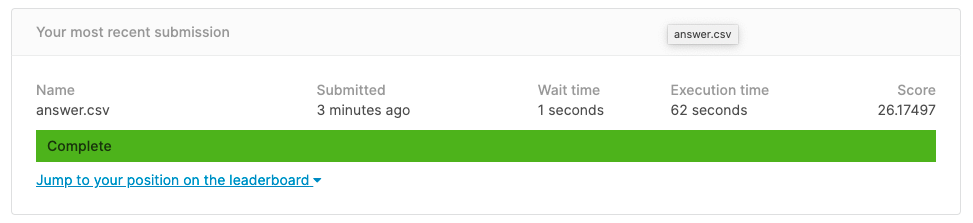